Simple use of Yolov8

In [43]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2
import cvzone

In [ ]:
model = YOLO('./yolo_model/yolov8n.pt')
results = model('./images/people.jpeg')

classes = model.names # Name of the index of each class.
# result = model('./images/people.jpeg', show=True)

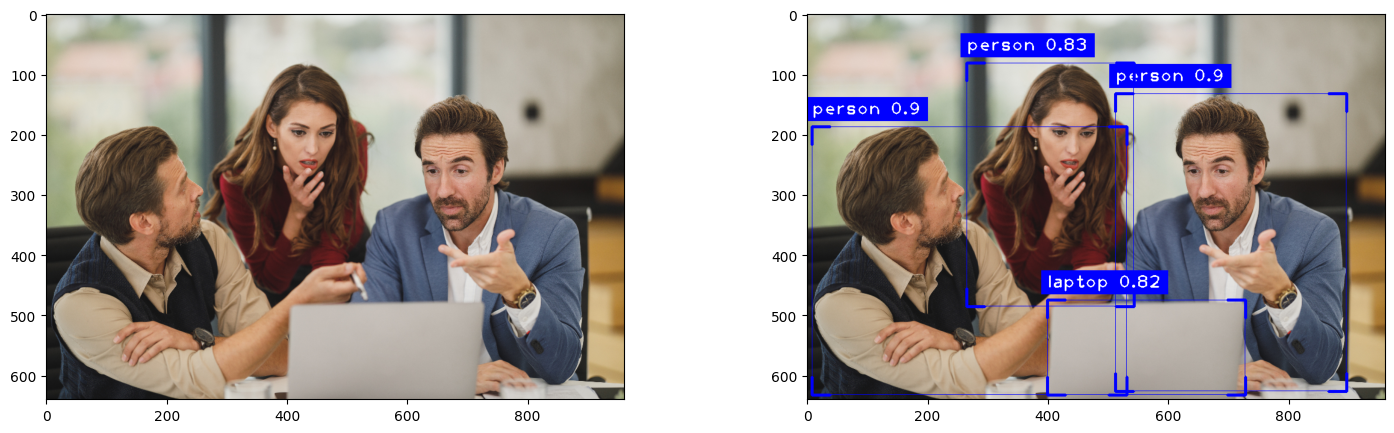

In [88]:
image = cv2.imread('./images/people.jpeg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_copy = image.copy()

boxes = results[0].boxes.data

for box in boxes:
    x1, y1, x2, y2 = int(box[0]), int(box[1]), int(box[2]), int(box[3])
    conf, cls = round(float(box[4]), 2), int(box[5])

    cvzone.cornerRect(image, (x1, y1, x2-x1, y2-y1), t=4, colorC=(0, 0, 255), colorR=(0, 0, 255))
    cvzone.putTextRect(image, f'{classes[cls]} {conf}', (x1, y1-20), 2, 2, colorR=(0, 0, 255))

fig, axe = plt.subplots(1, 2, figsize=(18, 5))
axe[0].imshow(image_copy)
axe[1].imshow(image)

In [89]:
def draw_boxes(image, tensor_boxes, classes):
    for box in tensor_boxes:
        x1, y1, x2, y2 = int(box[0]), int(box[1]), int(box[2]), int(box[3])
        conf, cls = round(float(box[4]), 2), int(box[5])

        cvzone.cornerRect(image, (x1, y1, x2-x1, y2-y1), t=4, colorC=(0, 0, 255), colorR=(0, 0, 255))
        cvzone.putTextRect(image, f'{classes[cls]} {conf}', (x1, y1-20), 2, 2, colorR=(0, 0, 255))
    return image

def search_objects(url_image, yolo_model):
    # Searching boxes with Yolo.
    results = yolo_model(url_image)
    boxes = results[0].boxes.data
    classes = yolo_model.names # Name of the index of each class.

    # Loading image.
    image = cv2.imread(url_image)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    image = draw_boxes(image, boxes,  classes)

    return image


image 1/1 /home/christian/Programacion/my_machine_learning_jupyter_notebooks/computer_vision/images/people.jpeg: 448x640 3 persons, 1 laptop, 176.9ms
Speed: 3.2ms preprocess, 176.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


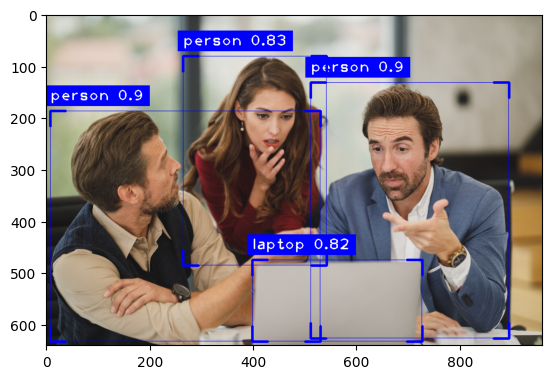

In [96]:
plt.imshow(search_objects('./images/people.jpeg', model))


image 1/1 /home/christian/Programacion/my_machine_learning_jupyter_notebooks/computer_vision/images/people.png: 640x320 1 person, 1 handbag, 143.7ms
Speed: 2.5ms preprocess, 143.7ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)


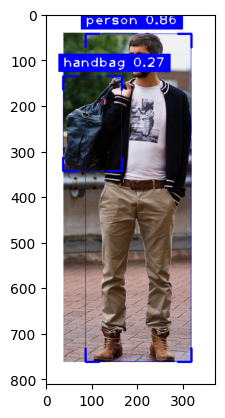

In [97]:
plt.imshow(search_objects('./images/people.png', model))